In [201]:
import numpy as np
import pandas as pd

## Pré-processamento dos dados

<hr>

Sabemos que o dataset é composto por 784 pixels e uma coluna label que representa o verdadeiro digito (```y=label```), temos como requisito a utilização de classificador binário (inserir aqui o PLA Pocket + regressão linear para reta inicial), e estes consistem em separar dados por uma reta no  $\mathbb{R}²$ então não podemos trabalhar em  $\mathbb{R}^{784}$, para isso é necessário realizar duas operações para redimensionar nossos dados para que seja viável a aplicação do classificador. 

Os dois processor que são realizados é o de captação da densidade e da simetria da imagem de acordo com os pixels, visto que os pixels estão em uma escala de cinza que vai de ```[0,255]```, onde $0$ é branco e $255$ é totalmente preto.

In [202]:
# Leitura dos dados, utilizando pandas pela praticidade 

data_train = pd.read_csv("data/train.csv", index_col = 0)

In [203]:
# Obtenção dos labels e dos pixels, utilizando numpy pela eficiência

label = np.array(data_train['label'])
pixels = np.array(data_train.iloc[:,1:])
pixels, label , pixels.shape

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 array([1, 1, 0, ..., 1, 7, 9]),
 (27773, 784))

### Intensidade:
Dada pela equação: $$I= \frac{\sum_{n=0}^{783}pixel_i}{255}$$

In [204]:
I = [np.sum(i)/255 for i in pixels];len(I)

27773

### Simetria vertical:
Dada pela equação: $$S_v= \frac{\sum_{i=0}^{27}\sum_{j=0}^{13}||pixel_{i,j} - pixel_{i,27-j}||}{255}$$

In [205]:
S_v = np.zeros(pixels.shape[0])
for p in range(pixels.shape[0]):
    res = pixels[p].reshape(28,28)
    soma = 0
    for i in range(27):
        for j in range(13):
            soma += np.sum(np.linalg.norm(res[i][j] - res[i][27-j]))
    S_v[p] = soma/255

In [206]:
S_v

array([52.82745098,  8.12941176, 49.94117647, ..., 22.2627451 ,
       56.23921569, 48.77647059])

Para obter a Simetria horizontal  basta pegar a matriz transposta da vertical e tratar como se o fosse a simetria vertical: 

In [207]:
S_h = np.zeros(pixels.shape[0])
for p in range(pixels.shape[0]):
    res = pixels[p].reshape(28,28).T
    soma = 0
    for i in range(27):
        for j in range(13):
            soma += np.sum(np.linalg.norm(res[i][j] - res[i][27-j]))
    S_h[p] = soma/255

Obtendo a média aritimética das duas simetrias:

In [208]:
S = np.array([(S_h[i]+ S_v[i])/2 for i in range(len(S_v))])
S

array([53.58235294,  7.39803922, 50.28823529, ..., 20.67647059,
       67.38823529, 46.35294118])

Obtendo o novo dataset composto pela intensidade, simetria e labels:

In [275]:
new_data = np.column_stack((I,S_h,label));new_data

array([[ 65.29019608,  54.3372549 ,   1.        ],
       [ 52.64705882,   6.66666667,   1.        ],
       [ 90.43529412,  50.63529412,   0.        ],
       ...,
       [ 52.60784314,  19.09019608,   1.        ],
       [123.54509804,  78.5372549 ,   7.        ],
       [ 71.28627451,  43.92941176,   9.        ]])

## Análise do pré-processamento

<hr>

Agora temos os dados em  $\mathbb{R}²$, que podem ser separados pelo nosso conjunto de hipótese dos nossos modelos lineares, agora vamos verificar se é possível realizar distinção dos digitos tomados 2 a 2:

Função que tem como objetivo escolher apenas 2 labels distintos do dataset para realizar a predição:

In [276]:
def selectNUM(x,y, data):
    data_select = []
    for i in range(len(data)):
        if data[i][2] == x or data[i][2] == y:
            data_select.append(data[i])
    
    return np.array(data_select)


In [277]:
def cat_diff(x,y,data):
    data_X = []
    data_Y = []
    for i in range(len(data)):
        if data[i][2] == x:
            data_X.append(data[i])
        else:
            data_Y.append(data[i])
    data_X = np.array(data_X)
    data_Y = np.array(data_Y)
    print(f'Média da Intensidade do digito {x}: {np.mean(data_X.T[0])}, Média da Simetria do digito {x}: {np.mean(data_X.T[1])}\n')
    print(f'Média da Intensidade do digito {y}: {np.mean(data_Y.T[0])}, Média da Simetria do digito {y}: {np.mean(data_Y.T[1])}\n')

    return data_X, data_Y

In [278]:
dataset_1x5 = selectNUM(1,5, new_data)

In [279]:
dataset_1x5

array([[ 65.29019608,  54.3372549 ,   1.        ],
       [ 52.64705882,   6.66666667,   1.        ],
       [ 48.41176471,  22.58823529,   1.        ],
       ...,
       [121.03529412,  65.24705882,   5.        ],
       [ 84.96470588,  27.83529412,   1.        ],
       [ 52.60784314,  19.09019608,   1.        ]])

Para verificar se houve distinção entre o 5 e o 1 vamos obter os valores centrais:


In [280]:
pontos1, pontos5 = cat_diff(1,5,dataset_1x5)

Média da Intensidade do digito 1: 59.72835060513433, Média da Simetria do digito 1: 34.44044707870474

Média da Intensidade do digito 5: 101.13182723514335, Média da Simetria do digito 5: 63.55955435998763



In [281]:
pontos1[:,:-1].T[1]

array([54.3372549 ,  6.66666667, 22.58823529, ...,  8.4627451 ,
       27.83529412, 19.09019608])

In [290]:
def plot_2digits(x,y):
    import matplotlib.pyplot as plt
    plt.grid(alpha= 0.2)
    plt.scatter(x[:,:-1].T[0],x[:,:-1].T[1], c = 'gold', alpha=0.3, label= f'{int(x[0][2])}')
    plt.scatter(y[:,:-1].T[0],y[:,:-1].T[1] ,c = 'gray', alpha=0.3, label= f'{int(y[0][2])}')
    plt.title('Comparação entre dois dígitos')
    plt.ylabel('Densidade')
    plt.xlabel('Simetria')
    plt.legend()
    plt.show()
    

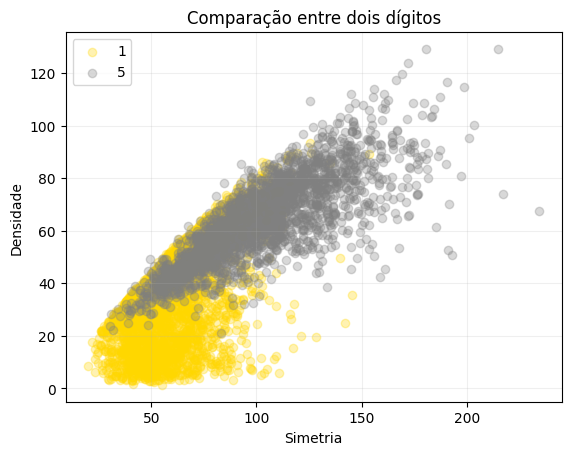

In [291]:
plot_2digits(pontos1,pontos5)

<hr>
Teste para identificar qual simetria melhor distancia o digito 1, do digito 5: 
<hr>

In [215]:
59.75045428936446 - 33.77516339869281 #  Utilizando a média entre as duas simetrias 

25.97529089067165

In [216]:
55.941354218741324 - 33.10987971868088 # Utilizando apenas a simetria vertical

22.831474500060445

In [217]:
63.55955435998763 - 34.44044707870474 # Utilizando apenas a simetria horizontal

29.119107281282886

<hr>

Como possível observar acima, houve distinção entre Intensidade e simetria entre os dígitos 1 e 5 após o pré-processamento que faz válida a lógica de que o 1 é menos intenso e mais simétrico que o 5, visto que simetria = 0 significa que ele é perfeitamente simétrico.

<hr>